In [1]:
#!/usr/bin/env python3

import chardet
import csv
import json
import matplotlib
import nibabel as nib
import nilearn
import numpy as np
import os
import pandas as pd
import random
import regex as re
import shutil
import string
import struct
import sys

from chardet import UniversalDetector as udet
from collections import Counter
from functools import reduce
from io import StringIO
from io import BytesIO
from os.path import basename as bname
from os.path import dirname as dname
from os.path import expanduser as xpu
from os import listdir as ls
from os.path import join as pjoin
from pandas import DataFrame as df
from string import printable
from typing import Union
from zipfile import ZipFile
from tqdm import tqdm
from typing import Generator
# from typing import list_iterator
from unidecode import unidecode
from operator import itemgetter

from nilearn.glm.first_level import make_first_level_design_matrix as mfldm
from nilearn.glm.first_level import first_level_from_bids
from nilearn.plotting import plot_design_matrix as plot1dm

from sniffbytes import flatten
from sniffbytes import loadfiles
from sniffbytes import loadimages

from bidsify_utils import bidsify_load_scans
from bidsify_utils import bidsify_names

# from json_read import json_read

import sniffbytes as snif

from scanzip_f import scanzip_f
from scanzip import scanzip
# from fetch_cimaq import fetch_cimaq
from nilearn import image
from dict2csv import dict2csv

from removeEmptyFolders import removeEmptyFolders
# from multiple_replace import multiple_replace

from cimaq import cimaq

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/glm/__init__.py:56: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  'It may change in any future release of Nilearn.', FutureWarning)


In [1]:
from os.path import expanduser as xpu
from cimaq import cimaq
cimaq_dir = xpu('~/../../data/simexp/datasets/cimaq_03-19/')

cimaq = cimaq.fetch(cimaq_dir)

scanning archive: 100%|██████████| 94/94 [00:01<00:00, 50.21it/s]
indexing participants: 282it [00:00, 593.88it/s]
cleaning: 282it [00:05, 49.67it/s]
loading subjects: 100%|██████████| 94/94 [00:00<00:00, 402.78it/s]


In [16]:
display(cimaq.sample(1).reset_index().iloc[0].scans, cimaq.sample(1).reset_index().iloc[0].T)

,filename,ext,parent,fpaths,subid,ses,run,task,modality,dccid
1928,sub-659068_ses-4_run-01_task-idle_FLAIR,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,FLAIR,659068
1929,sub-659068_ses-4_run-01_task-idle_FLAIR,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,FLAIR,659068
1930,sub-659068_ses-4_run-01_task-idle_PD,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,PD,659068
1931,sub-659068_ses-4_run-01_task-idle_PD,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,PD,659068
1932,sub-659068_ses-4_run-01_task-idle_T1w,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,T1w,659068
1933,sub-659068_ses-4_run-01_task-idle_T1w,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,T1w,659068
1934,sub-659068_ses-4_run-01_task-idle_T2star,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,T2star,659068
1935,sub-659068_ses-4_run-01_task-idle_T2star,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,T2star,659068
1936,sub-659068_ses-4_run-01_task-idle_T2w,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,T2w,659068
1937,sub-659068_ses-4_run-01_task-idle_T2w,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-659068,ses-4,run-01,task-idle,T2w,659068


index                                                       11
subid                                           3708747_484204
events           trialnumber trial_type trialcode oldnumber...
behav            category                         stim oldn...
confounds         motion_tx  motion_ty  motion_tz  motion_r...
dccid                                                   197192
scans                                                 filen...
Name: 0, dtype: object

In [2]:
from fetch_cimaq import get_cimaq_ids
import sniffbytes as snif

snif.filter_lst_inc(["108391"], get_cimaq_ids(cimaq_dir))

NameError: name 'cimaq_dir' is not defined

In [25]:
# from fetch_cimaq import clean_cimaq
# from fetch_cimaq import xtrct_cimaq
# from fetch_cimaq import index_cimaq
# from fetch_cimaq import group_cimaq
# from fetch_cimaq import get_cimaq_qc

# def load_cimaq(cimaq_dir: Union[str, os.PathLike]) -> np.flatiter:
#     fetch_cimaq.instantiate_cimaq(reset = True)
#     valus = group_cimaq(clean_cimaq(index_cimaq(xtrct_cimaq(cimaq_dir))))
#     return df(((vals.iloc[0].subid,
#                 pd.concat([vals.iloc[1].clean_sheets.rename(
#                      columns = {'category': 'trial_type'}),
#                                   vals.iloc[0].clean_sheets.loc[:, 5:8],
#                                  pd.Series(vals.iloc[0].clean_sheets[8].astype(float) + 3.0,
#                                            name = 'duration').round(0)],
#                         axis = 1).drop(6, axis = 1).rename(
#                             columns = {5: 'onset', 7: 'fix_onset', 8: 'fix_duration'}),
#                 vals.iloc[2].clean_sheets)
#                 for vals in tqdm(valus,
#                                  desc = 'fetching CIMAQ')))

# test = load_cimaq(cimaq_dir)
# test
import fetch_cimaq
fetch_cimaq.get_cimaq_ids(cimaq_dir)

['108391_4509950',
 '120839_7424803',
 '122922_7874568',
 '127228_3865361',
 '139593_5760364',
 '147863_4694616',
 '150649_3801419',
 '164965_3431566',
 '175295_7308293',
 '178101_8600790',
 '189005_8278658',
 '197192_9929164',
 '199801_3163875',
 '219637_4398745',
 '229301_4669690',
 '247659_5375537',
 '254402_4475292',
 '255499_6168985',
 '258618_5348754',
 '258912_4548020',
 '267168_5522727',
 '270218_4557550',
 '271596_6023087',
 '314409_4810652',
 '326073_7113680',
 '336665_6274286',
 '337021_3494204',
 '350555_4117134',
 '370092_8656527',
 '385370_5477234',
 '386333_7485585',
 '396250_6417837',
 '403131_7060373',
 '408506_3970362',
 '413474_8330218',
 '427357_6957814',
 '437101_8875385',
 '439776_6258913',
 '441008_7256003',
 '458807_5089797',
 '459801_6121388',
 '462345_6334263',
 '484204_3708747',
 '490035_7661810',
 '502616_7459501',
 '517070_6281721',
 '520377_4118813',
 '543589_7435733',
 '549994_7729270',
 '555537_3514091',
 '567214_4501657',
 '597569_4050235',
 '619278_819

In [45]:
test.base

AttributeError: 'DataFrame' object has no attribute 'base'

In [2]:
# def get_cimaq_ids(cimaq_dir):
#     return snif.filter_lst_inc(get_cimaq_qc(cimaq_dir),
#                          ['_'.join(str(itm) for itm in row[1].values) for row in pd.read_csv(
#         pjoin(cimaq_dir, 'derivatives/CIMAQ_fmri_memory/data/participants/Participants_bids.tsv'),
#                 sep = '\t').iloc[:, [0, -2]].reset_index(drop = True).iterrows()])

# # ls(pjoin(cimaq_dir, 'derivatives/data'))
#                   #/participants/Participants_bids.tsv'))
# get_cimaq_ids(cimaq_dir).__len__()

scanning archive: 100%|██████████| 94/94 [00:02<00:00, 46.38it/s]
indexing participants: 282it [00:00, 609.60it/s]


ValueError: Must have equal len keys and value when setting with an iterable

In [18]:
cimaq

,subid,events,behav,confounds,dccid,scans
0,3025432_658178,trialnumber trial_type trialcode oldnumber...,category stim old...,motion_tx motion_ty motion_tz motion_r...,108391,filena...
1,3123186_920577,trialnumber trial_type trialcode oldnumber...,category stim oldnum...,motion_tx motion_ty motion_tz motion_r...,120839,filena...
2,3163875_199801,trialnumber trial_type trialcode oldnumber...,category stim oldnum...,motion_tx motion_ty motion_tz motion_r...,122922,filen...
3,3291977_748676,trialnumber trial_type trialcode oldnumber...,category stim o...,motion_tx motion_ty motion_tz motion_r...,127228,filen...
4,3400972_956130,trialnumber trial_type trialcode oldnumber...,category stim ...,motion_tx motion_ty motion_tz motion_r...,139593,filen...
...,...,...,...,...,...,...
89,9003010_785245,trialnumber trial_type trialcode oldnumber...,category stim ol...,motion_tx motion_ty motion_tz motion_r...,979001,filename...
90,9249304_778749,trialnumber trial_type trialcode oldnumber...,category stim old...,motion_tx motion_ty motion_tz motion_r...,983291,filename...
91,9296157_955548,trialnumber trial_type trialcode oldnumber...,category stim ...,motion_tx motion_ty motion_tz motion_r...,988602,file...
92,9494076_630120,trialnumber trial_type trialcode oldnumber...,category stim o...,motion_tx motion_ty motion_tz motion_r...,996599,filename...


In [20]:
loadimages(pjoin(os.getcwd(), 'newtest/behavioural'))

['/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_8278658_189005_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_9249304_778749_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_5028259_804743_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_7516889_979001_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_6957814_427357_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_3967609_932933_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_3400972_956130_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_4509950_108391_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory/newtest/behavioural/sub-_6421082_628299_run-01_task-encoding_behavioural.tsv',
 '/home/fnadeau/cimaq_memory

In [22]:
randsub = cimaq.sample(1).reset_index()
randsub.iloc[0].scans


def index_cimaq(vals: pd.DataFrame,
                cimaq_dir: Union[str, os.PathLike]) -> pd.DataFrame:
    vals[['has_header', 'subid']] = \
         [(snif.get_has_header(row[1].bsheets),
           snif.filter_list_inc([row[1].filename.split('_')[0].split('-')[1]],
                                get_cimaq_ids(cimaq_dir)))
          for row in tqdm(
              vals.iterrows(),
              desc = 'indexing participants')]
    return vals

,filename,ext,parent,fpaths,subid,ses,run,task,modality,dccid
0,sub-108391_ses-4_run-01_task-idle_FLAIR,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,FLAIR,108391
1,sub-108391_ses-4_run-01_task-idle_FLAIR,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,FLAIR,108391
2,sub-108391_ses-4_run-01_task-idle_PD,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,PD,108391
3,sub-108391_ses-4_run-01_task-idle_PD,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,PD,108391
4,sub-108391_ses-4_run-01_task-idle_T1w,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,T1w,108391
5,sub-108391_ses-4_run-01_task-idle_T1w,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,T1w,108391
6,sub-108391_ses-4_run-01_task-idle_T2star,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,T2star,108391
7,sub-108391_ses-4_run-01_task-idle_T2star,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,T2star,108391
8,sub-108391_ses-4_run-01_task-idle_T2w,.nii.gz,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,T2w,108391
9,sub-108391_ses-4_run-01_task-idle_T2w,.json,anat,/home/fnadeau/../../data/simexp/datasets/cimaq...,sub-108391,ses-4,run-01,task-idle,T2w,108391


In [119]:
pd.concat([['sub-_' + row[1].subid +itm.fpaths] for itm in cimaq.scans.values.flat]).values.tolist()



TypeError: expected str, bytes or os.PathLike object, not Series

In [ ]:
def copy_cimaq(cimaq_dir: Union[str, os.PathLike],
               dst_path: Union[str, os.PathLike]) -> None:
    dst_path = [dst_path if dst_path
                              else pjoin(dname(os.getcwd()),
                                         'cimaq_2021_test')][0]
    os.makedirs(dst_path, exist_ok = True)
    return [shutil.copyfile(itm[0], itm[1]) for itm in
            tqdm(tuple(zip([pjoin(,
                  bname(bidsify_names(aname)))
            for aname in pd.concat([itm for itm in cimaq.fetch(cimaq_dir).scans.values.tolist().__iter__()],
                      ignore_index = True).fpaths.values.tolist().__iter__()])),
                 desc = 'copying CIMA-Q')]

In [76]:
help(shutil.copyfile)

Help on function copyfile in module shutil:

copyfile(src, dst, *, follow_symlinks=True)
    Copy data from src to dst.
    
    If follow_symlinks is not set and src is a symbolic link, a new
    symlink will be created instead of copying the file it points to.



In [3]:
# Path to where the CIMA-Q dataset is located
# The only parameter needed from user
cimaq_dir = xpu('~/../../data/simexp/datasets/cimaq_03-19/')

In [110]:
cimaq.iloc[:, 1:4]
mkdir(xpu('~/'))

,events,behav,confounds
0,trialnumber trial_type trialcode oldnumber...,category stim old...,motion_tx motion_ty motion_tz motion_r...
1,trialnumber trial_type trialcode oldnumber...,category stim oldnum...,motion_tx motion_ty motion_tz motion_r...
2,trialnumber trial_type trialcode oldnumber...,category stim oldnum...,motion_tx motion_ty motion_tz motion_r...
3,trialnumber trial_type trialcode oldnumber...,category stim o...,motion_tx motion_ty motion_tz motion_r...
4,trialnumber trial_type trialcode oldnumber...,category stim ...,motion_tx motion_ty motion_tz motion_r...
...,...,...,...
89,trialnumber trial_type trialcode oldnumber...,category stim ol...,motion_tx motion_ty motion_tz motion_r...
90,trialnumber trial_type trialcode oldnumber...,category stim old...,motion_tx motion_ty motion_tz motion_r...
91,trialnumber trial_type trialcode oldnumber...,category stim ...,motion_tx motion_ty motion_tz motion_r...
92,trialnumber trial_type trialcode oldnumber...,category stim o...,motion_tx motion_ty motion_tz motion_r...


In [88]:
dir('ooo'.encode().hex())



['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

In [15]:
import tarfile
import zipfile
def get_tarfile_size(tarfile_path):
    with zipfile.ZipFile(tarfile_path) as myzip:
        sizes = [snif.sizeof_fmt(myzip.open(name).read().getvalue) for name in scanzip.getnametpl(myzip)]
    tfile.close
    return sizes

get_tarfile_size(xpu('~/cimaq2021.tar.gz'))
# # 
# # test = sizeof_fmt(df(((bname(apath), os.path.getsize(apath)) for apath in testpaths))[1].sum())
# # test
# ls(dname(dname(cimaq_dir))), ls(cimaq_dir)
# sorted(ls(xpu('~/')))

BadZipFile: File is not a zip file

In [ ]:
#! /usr/bin/env python

import os
import pandas as pd
import shutil
from pandas import DataFrame as df
from os.path import basename as bname
from os.path import dirname as dname
from os.path import expanduser as xpu
from typing import Union
from bidsify_utils import bidsify_names
from fetch_cimaq import cimaq

def copy_cimaq(cimaq_dir: Union[str, os.PathLike],
               dst_path: Union[str, os.PathLike]) -> None:
    return [shutil.copyfile(itm[0], itm[1]) for itm in
            tuple(zip([pjoin([dst_path if dst_path
                              else pjoin(os.getcwd(),
                                         'cimaq_2021_test')][0],
                  bname(bidsify_names(aname)))
            for aname in pd.concat([itm for itm in cimaq.fetch(cimaq_dir).scans.values.tolist().__iter__()],
                      ignore_index = True).fpaths.values.tolist().__iter__()]))]
def main():    
    if __name__ == "__main__":
        return copy_cimaq(cimaq_dir, dst_path)


In [98]:
def copy_cimaq(cimaq_dir: Union[str, os.PathLike]) -> None:
    testpaths = pd.concat([itm for itm in cimaq.scans.values.tolist()],
                          ignore_index = True).fpaths.values.tolist()
    os.makedirs(pjoin(os.getcwd(), 'cimaq_2021_test'), exist_ok = True)
    newpaths = [pjoin(os.getcwd(), 'cimaq_2021_test',
                      bname(bidsify_names(aname)))
                for aname in testpaths]
    [snif.stream2file(snif.get_bytes(itm[0]), itm[1]) for itm in tqdm(tuple(zip(testpaths, newpaths)),
                                                                  desc = 'copying CIMA-Q')]

copy_cimaq(cimaq_dir)

copying CIMA-Q: 100%|██████████| 3204/3204 [07:50<00:00,  6.81it/s]


In [95]:
from bidsify_utils import bidsify_names

[shutil.copyfile(itm[0], itm[1]) for itm in tuple(zip([pjoin(os.getcwd(), 'cimaq_2021_test',
                  bname(bidsify_names(aname)))
            for aname in pd.concat([itm for itm in cimaq.scans.values.tolist()],
                      ignore_index = True).fpaths.values.tolist()]))]
# [itm[1].fpaths for itm in cimaq.values.tolist() if 'fpaths' in list(itm[1].columns)]
testpaths = pd.concat([itm for itm in cimaq.scans.values.tolist()],
                      ignore_index = True).fpaths.values.tolist()
os.makedirs(pjoin(os.getcwd(), 'cimaq_2021_test'), exist_ok = True)
newpaths = [pjoin(os.getcwd(), 'cimaq_2021_test',
                  bname(bidsify_names(aname)))
            for aname in testpaths]
[shutil.copyfile(itm[0], itm[1]) for itm in tuple(zip(testpaths, newpaths))]




#.__len__(), [itm.fpaths for itm in cimaq.scans.values.tolist()].__len__()

(('/home/fnadeau/../../data/simexp/datasets/cimaq_03-19/sub-108391/ses-4/anat/sub-108391_ses-4_FLAIR.nii.gz',
  '/home/fnadeau/cimaq_memory/sub-108391_run-01_ses-4_task-idle_ses-4_FLAIR.nii.gz'),
 ('/home/fnadeau/../../data/simexp/datasets/cimaq_03-19/sub-108391/ses-4/anat/sub-108391_ses-4_FLAIR.json',
  '/home/fnadeau/cimaq_memory/sub-108391_run-01_ses-4_task-idle_ses-4_FLAIR.json'),
 ('/home/fnadeau/../../data/simexp/datasets/cimaq_03-19/sub-108391/ses-4/anat/sub-108391_ses-4_PD.nii.gz',
  '/home/fnadeau/cimaq_memory/sub-108391_run-01_ses-4_task-idle_ses-4_PD.nii.gz'),
 ('/home/fnadeau/../../data/simexp/datasets/cimaq_03-19/sub-108391/ses-4/anat/sub-108391_ses-4_PD.json',
  '/home/fnadeau/cimaq_memory/sub-108391_run-01_ses-4_task-idle_ses-4_PD.json'),
 ('/home/fnadeau/../../data/simexp/datasets/cimaq_03-19/sub-108391/ses-4/anat/sub-108391_ses-4_T1w.nii.gz',
  '/home/fnadeau/cimaq_memory/sub-108391_run-01_ses-4_task-idle_ses-4_T1w.nii.gz'),
 ('/home/fnadeau/../../data/simexp/datasets/

In [102]:
os.mkdir(xpu('~/cimaq_2021_test'))
shutil.move(pjoin(os.getcwd(), 'cimaq_2021_test'), xpu('~/cimaq_2021_test'))


'/home/fnadeau/cimaq_2021_test/cimaq_2021_test'

In [106]:
os.rename(xpu('~/cimaq_2021_test'), xpu('~/cimaq_2021_test_tmp'))

In [107]:
shutil.move(xpu('~/cimaq_2021_test_tmp/cimaq_2021_test'), xpu('~/'))

'/home/fnadeau/cimaq_2021_test'

In [108]:
ls('/home/fnadeau/cimaq_2021_test'
)

['sub-490035_ses-4_run-04_task-idle_run-04_epi.nii.gz',
 'sub-783781_ses-4_run-02_task-idle_run-02_epi.nii.gz',
 'sub-147863_run-01_ses-4_task-idle_ses-4_T1w.nii.gz',
 'sub-175295_run-01_ses-4_task-idle_ses-4_T1w.json',
 'sub-658178_ses-4_run-02_task-idle_run-02_epi.nii.gz',
 'sub-427357_run-01_ses-4_task-idle_ses-4_T2w.json',
 'sub-597569_ses-4_run-02_task-idle_run-02_magnitude2.nii.gz',
 'sub-677561_run-01_ses-4_task-idle_ses-4_dwi.json',
 'sub-955548_ses-4_run-02_task-idle_run-02_epi.json',
 'sub-729722_ses-4_run-01_task-idle_run-01_epi.nii.gz',
 'sub-711830_ses-4_run-01_task-idle_run-01_epi.json',
 'sub-271596_run-01_ses-4_task-rest_bold.nii.gz',
 'sub-729722_ses-4_run-01_task-idle_run-01_epi.json',
 'sub-915022_run-01_ses-4_task-idle_ses-4_dwi.nii.gz',
 'sub-893978_run-01_ses-4_task-idle_ses-4_T1w.nii.gz',
 'sub-915022_ses-4_run-04_task-idle_run-04_epi.json',
 'sub-979001_ses-4_run-01_task-idle_run-01_epi.nii.gz',
 'sub-983291_run-01_ses-4_task-idle_ses-4_T2star.nii.gz',
 'sub-658

### Nilearn First Level Matrix parameters developped:
- https://nilearn.github.io/modules/generated/nilearn.glm.first_level.make_first_level_design_matrix.html#nilearn.glm.first_level.make_first_level_design_matrix


#### The pd.DataFrame instance might have these keys:
##### "onset" and "duration" are mandatory

- ‘onset’: column to specify the start time of each events in
   seconds. An error is raised if this key is missing.

- ‘trial_type’: column to specify per-event experimental conditions
   identifier. If missing each event are labelled ‘dummy’ and considered to form a unique condition.

- ‘duration’: column to specify the duration of each events in
   seconds. If missing the duration of each events is set to zero.

- ‘modulation’: column to specify the amplitude of each
   events. If missing the default is set to ones(n_events).



In [6]:
sub00 = cimaq.sample(1).reset_index(drop = True)
sub00

,subid,events,behav,confounds,dccid,scans
0,8330218_413474,trialnumber trial_type trialcode oldnumber...,category stim old...,motion_tx motion_ty motion_tz motion_r...,920577,file...


In [78]:
sub00.scans.values

AttributeError: 'Series' object has no attribute 'fpaths'

In [8]:
# load a random participant
data_dir = pjoin(os.getcwd(), '_testing_nilearn' + \
                              sub00.subid.iloc[0])
drv_dir = pjoin(data_dir, 'derivatives')
os.makedirs(drv_dir, exist_ok = True)
sub00.confounds.iloc[0].to_csv(pjoin(drv_dir, 'sub-' + sub00.subid.iloc[0] + \
                                     '_task-memory_confounds.tsv'),
                               sep = '\t')
sub00.events.iloc[0].to_csv(pjoin(drv_dir, 'sub-' + sub00.subid.iloc[0] + \
                                  '_task-memory_events.tsv'),
                            sep = '\t')

sub00.confounds.iloc[0]
sub00 = cimaq.sample(1).reset_index(drop = True)
os.makedirs(data_dir, exist_ok = True)
[shutil.copyfile(apath, pjoin(data_dir, bname(apath)))
 for apath in sub00.scans.iloc[0].fpaths]



['/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_FLAIR.json',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_FLAIR.nii.gz',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_PD.json',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_PD.nii.gz',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_T1w.json',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_T1w.nii.gz',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_T2star.nii.gz',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_T2star.json',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_T2w.nii.gz',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_T2w.json',
 '/home/fnadeau/cimaq_memory/_testing_nilearn8330218_413474/sub-659068_ses-4_dwi.bvec',
 '/home/fnadea

In [9]:
testimpath = xpu('/home/fnadeau/cimaq_memory/_testing_nilearn3750063_956049/sub-659068_ses-4_FLAIR.nii.gz')
dict(nib.load(testimpath).header)

{'sizeof_hdr': array(348, dtype=int32),
 'data_type': array(b'', dtype='|S10'),
 'db_name': array(b'', dtype='|S18'),
 'extents': array(0, dtype=int32),
 'session_error': array(0, dtype=int16),
 'regular': array(b'r', dtype='|S1'),
 'dim_info': array(54, dtype=uint8),
 'dim': array([  3, 256, 256,  48,   1,   1,   1,   1], dtype=int16),
 'intent_p1': array(0., dtype=float32),
 'intent_p2': array(0., dtype=float32),
 'intent_p3': array(0., dtype=float32),
 'intent_code': array(0, dtype=int16),
 'datatype': array(4, dtype=int16),
 'bitpix': array(16, dtype=int16),
 'slice_start': array(0, dtype=int16),
 'pixdim': array([-1.    ,  0.9375,  0.9375,  3.    ,  9.    ,  0.    ,  0.    ,
         0.    ], dtype=float32),
 'vox_offset': array(0., dtype=float32),
 'scl_slope': array(nan, dtype=float32),
 'scl_inter': array(nan, dtype=float32),
 'slice_end': array(0, dtype=int16),
 'slice_code': array(0, dtype=uint8),
 'xyzt_units': array(10, dtype=uint8),
 'cal_max': array(0., dtype=float32),
 '

In [10]:
def test_resampling2(niimgs):
    return df(((bname(niimgs[img[0]]),
                  nilearn.image.resample_to_img(
                      src[1], nib.load(niimgs[img[0]]),
                      interpolation='continuous',
                      fill_value=0, force_resample=False))
                 for src in tqdm(enumerate([itm for itm in niimgs if itm != niimgs[img[0]]]),
                             desc = 'resampling to 1 modality'))
                for img in tqdm(enumerate(niimgs),
                                desc = 'resampling across anat modalities',
                                total = 'total_bytes'))

In [11]:
[dict(nib.load(img).header)['dim'][0] for img in
 [itm for itm in loadimages(data_dir)
  if '.nii.gz' in itm]]

[3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3]

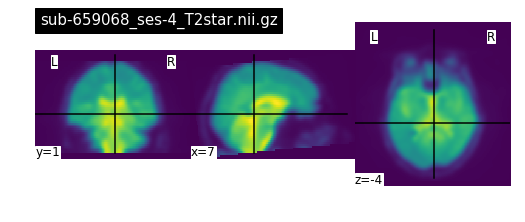

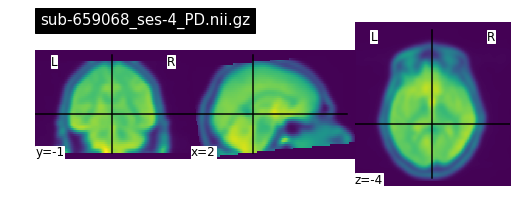

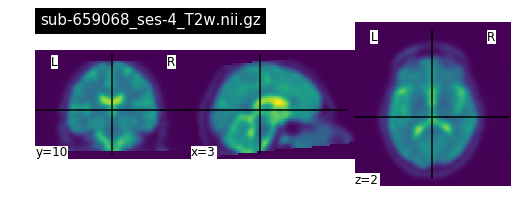

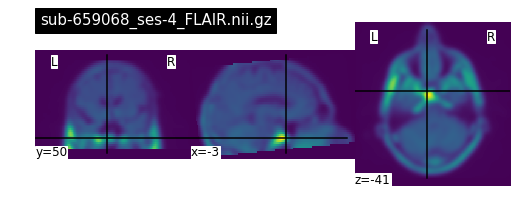

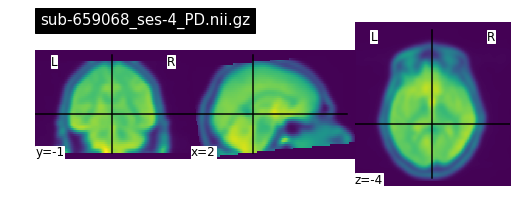

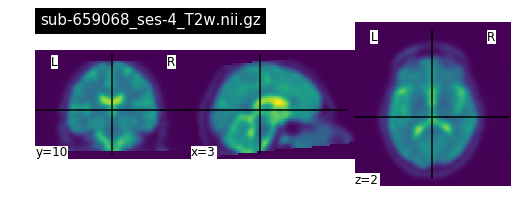

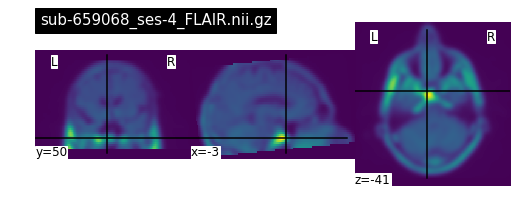

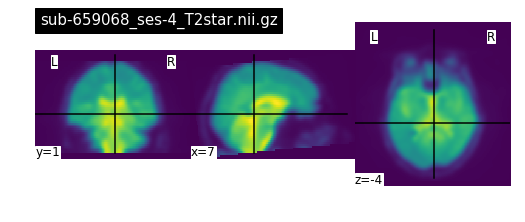

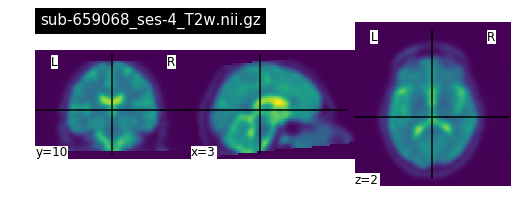

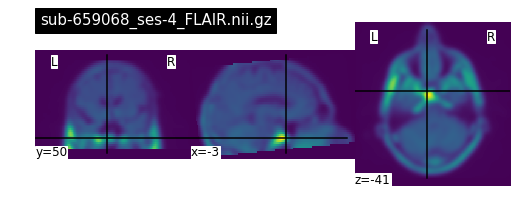

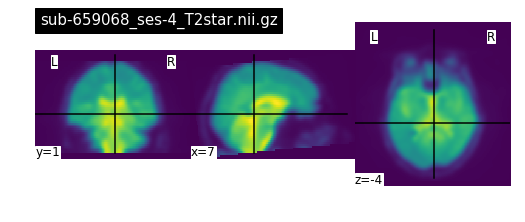

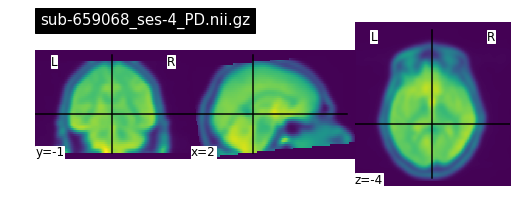

In [47]:
niimgs = list(enumerate([(itm, nib.load(itm)) for itm in [itm for itm in loadimages(data_dir) if
           itm.endswith('.nii.gz')]
          if str(dict(nib.load(itm).header)['dim'][0]) == '3' \
           and str(dict(nib.load(itm).header)['dim'][1]) == '256']))
def resample2all_anat(niimgs):
    allimgs = []
    for img in niimgs:
        target = img
        inputs = [animg for animg in niimgs if
                  animg != target]
        allimgs.append(df(((inpt[1][0],
                            nilearn.image.resample_to_img(nilearn.image.smooth_img(
                                inpt[1][1], fwhm = 9), nilearn.image.smooth_img(target[1][1],
                                                                                fwhm = 9)))
                           for inpt in inputs), columns = ['fpaths', 'scans']))
    return pd.concat(allimgs)
#     return pd.concat([df([(niimg[1][0],
#                            nilearn.image.resample_to_img(niimgs[niimg[0]][1][1], niimg[1][1]))
#                           for niimg in [img in niimgs if img != niimgs[niimg[0]]]
#                         for niimg in niimgs], columns = ['fpaths', 'scans'])

test01x = resample2all_anat(niimgs)
[nilearn.plotting.plot_img(row[1].scans, title = bname(row[1].fpaths)) for
 row in test01x.iterrows()]

In [26]:
len([str(<nilearn.plotting.displays.OrthoSlicer at 0x7f0c0f0f97f0>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0f099588>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0edcb320>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0ef040b8>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0ee4ae10>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0ed57ba8>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0ec2f940>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0eb906d8>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0e9b1470>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0e9101d0>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0cfa2f60>,
 <nilearn.plotting.displays.OrthoSlicer at 0x7f0c0cf00cf8>)])

SyntaxError: invalid syntax (<ipython-input-26-8a944005624e>, line 1)

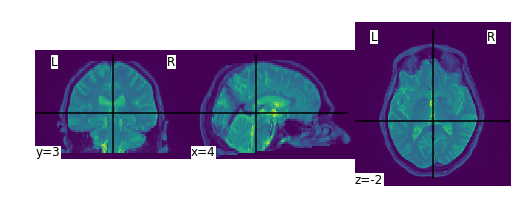

In [24]:
mean_image = nilearn.image.mean_img(test01x.scans)

nilearn.plotting.plot_img(nilearn.image.smooth_img(mean_image, fwhm = 0.5))

In [1]:
niimgs = [(itm, nib.load(itm)) for itm in [itm for itm in loadimages(data_dir) if
           itm.endswith('.nii.gz')]
          if str(dict(nib.load(itm).header)['dim'][0]) == '3' \
           and str(dict(nib.load(itm).header)['dim'][1]) == '256']
# [dict(nib.load(itm).header)['dim'][0] for itm in niimgs]
# [nilearn.plotting.plot_img(nib.load(img)) for img in niimgs]
# test_resampling2(niimgs)
test03 = [nilearn.image.resample_to_img(nib.load(row[1].scans), niimg)
          for niimg in niimgs[:3]]
[bname(apath) for apath in df(test01, columns = ['fpaths', 'scans']).fpaths]

NameError: name 'loadimages' is not defined

In [84]:
[nilearn.plotting.plot_img(img[1], title = 'destination: ' + img[0]) for img in test01]


TypeError: Cannot slice image objects; consider using `img.slicer[slice]` to generate a sliced image (see documentation for caveats) or slicing image array data with `img.dataobj[slice]` or `img.get_fdata()[slice]`

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


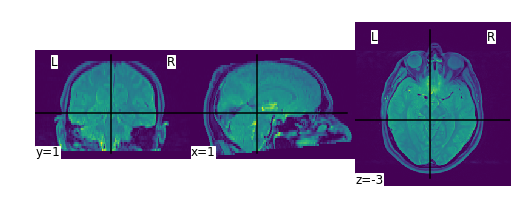

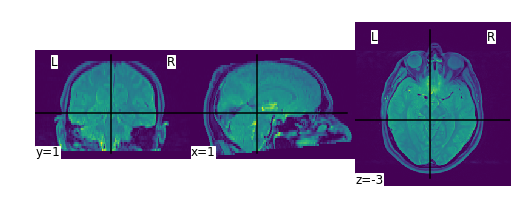

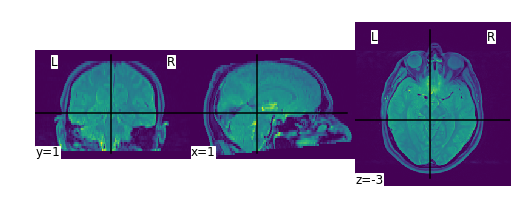

In [67]:
[nilearn.plotting.plot_img(img) for img in test02]

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


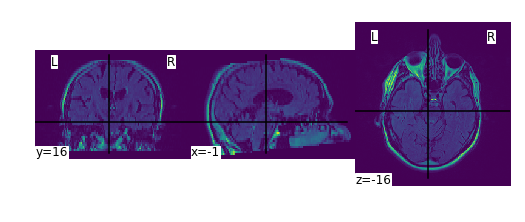

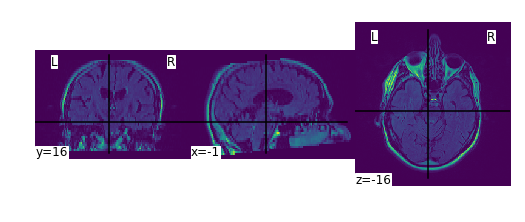

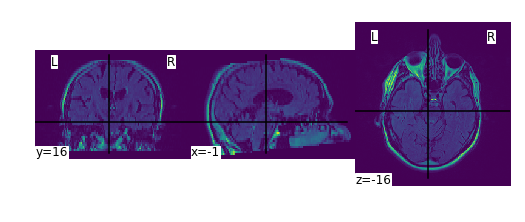

In [74]:
[nilearn.plotting.plot_img(img) for img in test03]

In [ ]:
testing2 = list(testing.values.flat)
testing2
def display_testing_resample(imglst):
    for itm in testing2:
        try:
            display(nilearn.plotting.plot_img(itm[1],
                                              title = itm[0])
                 )
        except:
            pass
        
display_testing_resample(testing2)        

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

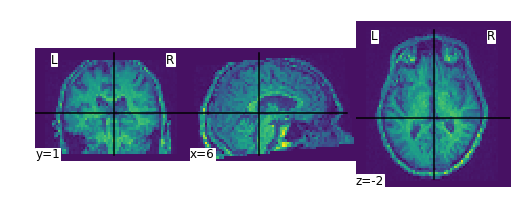

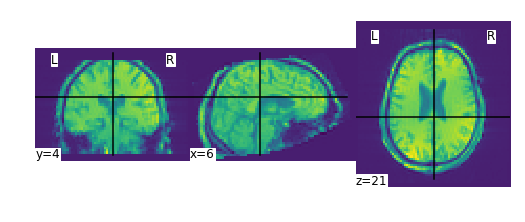

In [139]:
display([(val[0], nilearn.plotting.plot_img(val[1])) for val in list(testing.values.flat)])

In [79]:
def test_resampling(niimgs):
    allmasks = []
    for img in enumerate(niimgs):
        target = niimgs[img[0]]
        masks = []
        for src in enumerate([itm for itm in niimgs if itm != target]):

            masks.append(nilearn.image.resample_to_img(src[1], target,
                                      interpolation='continuous',
                                      fill_value=0, force_resample=False))
        allmasks.append(masks)
    return allmasks

niimgs = [nib.load(itm) for itm in loadimages(data_dir)
          if '.nii' in itm and 'bold' not in itm]

testing = test_resampling(niimgs)

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py

/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py:512: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/home/fnadeau/.local/lib/python3.6/site-packages/nilearn-0.7.0-py3.6.egg/nilearn/image/resampling.py

In [90]:
testing

[[<nibabel.nifti1.Nifti1Image at 0x7f397124c748>,

In [91]:
display([[nilearn.plotting.view_img(img)
          for img in itm] for itm in testing])

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

In [76]:
nilearn.image.concat_imgs(niimgs=niimgs, ensure_ndim=None,
                          memory_level=0,
                          auto_resample=False, verbose=0)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 4D and you provided a list of 4D images (5D). See http://nilearn.github.io/manipulating_images/input_output.html.

In [55]:
from nilearn.glm.first_level import first_level_from_bids
# task_label = 'memory'
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(data_dir)

TypeError: first_level_from_bids() missing 1 required positional argument: 'task_label'

In [54]:
display(models, models_run_imgs, models_events, models_confounds)

[]

[]

[]

[]

In [12]:
from io import StringIO

def json_bytes(apath: Union[str, os.PathLike]):
    with open(apath, 'rb', buffering = 0) as jfile:
        jbytes3 = json.load(jfile)
    jfile.close()
    return jbytes3

# jsons = list((row[1].filename, json_bytes(row[1].fpaths))
#              for row in tqdm(jsonfiles.iterrows()))


In [10]:
sub00.scans.values
nilearn.image.resample_to_img(source_img, target_img,
                              interpolation='continuous',
                              fill_value=0, force_resample=False)
read_bvals_bvecs(fbvals, fbvecs)
sub00['scans'] = [nib.load(row[1].fpaths) if '.nii' in all(row[1].ext)
                  else json_bytes(row[1].fpaths) if all(row[1].ext) == '.json'
                  else]

array([                                      filename      ext parent  \
3150   sub-996599_ses-4_run-01_task-idle_FLAIR    .json   anat   
3151   sub-996599_ses-4_run-01_task-idle_FLAIR  .nii.gz   anat   
3152      sub-996599_ses-4_run-01_task-idle_PD  .nii.gz   anat   
3153      sub-996599_ses-4_run-01_task-idle_PD    .json   anat   
3154     sub-996599_ses-4_run-01_task-idle_T1w    .json   anat   
3155     sub-996599_ses-4_run-01_task-idle_T1w  .nii.gz   anat   
3156  sub-996599_ses-4_run-01_task-idle_T2star  .nii.gz   anat   
3157  sub-996599_ses-4_run-01_task-idle_T2star    .json   anat   
3158     sub-996599_ses-4_run-01_task-idle_T2w  .nii.gz   anat   
3159     sub-996599_ses-4_run-01_task-idle_T2w    .json   anat   
3160     sub-996599_ses-4_run-01_task-idle_dwi    .bvec    dwi   
3161     sub-996599_ses-4_run-01_task-idle_dwi    .bval    dwi   
3162     sub-996599_ses-4_run-01_task-idle_dwi    .json    dwi   
3163     sub-996599_ses-4_run-01_task-idle_dwi  .nii.gz    dwi   
316

In [ ]:
nilearn.image.resample_to_img(source_img, target_img,
                              interpolation='continuous',
                              fill_value=0, force_resample=False)


In [ ]:
scan_infos[['scans', 'parameters']] = tuple(((nib.load(row[1].fpaths),
                                              df(nib.load(row[1].fpaths).header))
                                         for row in scan_infos.iterrows()))

In [ ]:
# list(pd.read_csv(apath, sep = '\t') for apath in events.fpaths)
# display(behav, events, scan_infos, jsonfiles, nifti_only, dwi_only)

# nifti_only['jsoninfo'] = jsonfiles.fpaths.tolist()

# mods = dict((grp, nifti_only.groupby('parent').get_group(grp))
#         for grp in nifti_only.groupby('parent').groups)





# nifti_only[['scans', 'parameters']] = tuple(((nib.load(fpath),
#                                               nib.load(fpath).header)
#                                              for fpath in nifti_only.fpaths))
# full_infos = pd.concat([df.from_dict({**dict(nib.load(row[1].fpaths).header),
#                                       **json_bytes(row[1].jsoninfo)},
#                                      orient = 'index').T
#                         for row in tqdm(nifti_only.iterrows())], join = 'inner')
# full_infos['filename'] = nifti_only['filename'].tolist()
# full_infos = full_infos.set_index('filename')
# full_infos.T

In [ ]:
display(dwi_scans[0], dwi_scans[1], dwi_scans[2])

In [ ]:
df.from_dict(mods['dwi'], orient ='index').T#, dwi_only

In [ ]:
full_infos.to_csv(pjoin(os.getcwd(), 'newdevs',
                        'inner_join_nifti_header_json.tsv'),
                  sep = '\t', index = None)

test = [row[1].values for row in full_infos.T.iterrows()]

test
# nifti_only[['scans', 'parameters']] = tuple(((nib.load(fpath),
#                                               nib.load(fpath).header)
#                                              for fpath in nifti_only.fpaths))

In [ ]:
import json
def dict2json(adict, dst_path: Union[str, os.PathLike]):

#     adict = {
#       'bill': 'tech',
#       'federer': 'tennis',
#       'ronaldo': 'football',
#       'woods': 'golf',
#       'ali': 'boxing'
#     }

    with open(dst_path, 'w') as json_file:
        json.dump(adict, json_file)
        json_file.close()

dict2json(cimaq_scan_parameters, pjoin(os.getcwd(), 'cimaq_scan_parameters.txt'))

In [ ]:
pjoin(os.getcwd(), 'cimaq_scan_parameters.csv')
cimaq_scans_json = json.load(pjoin(os.getcwd(), 'cimaq_scan_parameters.json'))
cimaq_scans_json

In [ ]:

dict2csv(cimaq_scan_parameters, pjoin(os.getcwd(), 'cimaq_scan_parameters.txt'))

list(cimaq_scan_parameters.keys())
# with open(pjoin(os.getcwd(), 'cimaq_scan_parameters.json'), 'w') as jfile:
#     json.dump(cimaq_scan_parameters, pjoin(os.getcwd(), 'cimaq_scan_parameters.json'))jfile.write(cimaq_scan_parameters)
# #     jfile.close()

# cimaq_scan_parameters

In [ ]:
params = pd.concat([df.from_dict(dict(row[1].parameters), orient = 'index')
                   for row in nifti_only.iterrows()], axis = 1).T
# params['filename'] = nifti_only.filename
# infos = df(df(((pd.Series(list(itm[1].values for itm in nifti_only.iteritems()) + \
#         list(itm[1].values for itm in params.iteritems()))))).T.values)
display(infos)
# nifti_only[params.columns] = [params.iteritems()]
# nifti_only

# pd.merge(params, nifti_only, on = 'filename', how = 'outer', axis =1)
# pd.concat((nifti_only, params), axis = 1)

In [ ]:
# Plotting anatomical images

from nilearn import plotting

nif = nifti_only.iloc[:5]
display([(row[1].filename,
          plotting.plot_img(image.load_img(row[1]['scans'])))
         for row in tqdm(nif.iterrows(), 'Plotting anatomical images')
 if 'anat' in row[1]['fpaths']])

In [ ]:


# # All ungrouped
# from nilearn import image

# jsonfiles = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                               if row[1].ext == '.json']]
# scan_infos = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                              if row[0] not in jsonfiles.index]]
# nifti_only = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                              if '.nii' in row[1].ext]]


# dwi_only = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                            if '.nii' not in row[1].ext
#                            and '.json' not in row[1].ext]]

# nifti_only = nifti_only.loc[[row[0] for row in nifti_only.iterrows()
#                              if row[1].fpaths not in dwi_only.fpaths]]


# nifti_only[['scans', 'parameters']] = tuple(((nib.load(fpath),
#                                               nib.load(fpath).header)
#                                              for fpath in nifti_only.fpaths))

# nif = nifti_only.iloc[:5]
# from nilearn import plotting
# display([(row[1].filename,
#           plotting.plot_img(image.load_img(row[1]['scans'])))
#          for row in nif.iterrows()
#  if 'anat' in row[1]['fpaths']])

In [ ]:
# nif = nifti_only.iloc[:5]
# from nilearn import plotting
# display([(row[1].filename,
#           plotting.plot_img(image.load_img(row[1]['scans'])))
#          for row in nif.iterrows()
#  if 'anat' in row[1]['fpaths']])

In [ ]:
# epis = nifti_only.iloc[14]

In [ ]:
# def _update_timestamp(path: os.PathLike, set_new: bool) -> None:
#     """
#     Context manager to set the timestamp of the path to plus or
#     minus a fixed delta, regardless of modifications within the context.

#     if set_new is True, the delta is added. Otherwise, the delta is subtracted.
#     """
#     stats = os.stat(path)
#     if set_new:
#         new_timestamp = (stats.st_atime_ns + _TIMESTAMP_DELTA, stats.st_mtime_ns + _TIMESTAMP_DELTA)
#     else:
#         new_timestamp = (stats.st_atime_ns - _TIMESTAMP_DELTA, stats.st_mtime_ns - _TIMESTAMP_DELTA)
#     try:
#         yield
#     finally:
#         os.utime(path, ns=new_timestamp)


# # Public Methods 

In [ ]:
# Ungrouped



# jsonfiles = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                               if row[1].ext == '.json']]
# scan_infos = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                              if row[0] not in jsonfiles.index]]
# nifti_only = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                              if '.nii' in row[1].ext]]


# dwi_only = scan_infos.loc[[row[0] for row in scan_infos.iterrows()
#                            if '.nii' not in row[1].ext
#                            and '.json' not in row[1].ext]]

# nifti_only = nifti_only.loc[[row[0] for row in nifti_only.iterrows()
#                              if row[1].fpaths not in dwi_only.fpaths]]



